In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
from datetime import datetime


In [ ]:
df = pd.read_csv('forex_predictions_data.csv')
print(df.shape)

In [ ]:
print(df.isnull().sum())


In [ ]:
df.describe()

In [ ]:
numeric_cols=['Open','High','Low','Close','Volume','Predicted_Close','Confidence']
for col in numeric_cols :
    if col in  df.columns:
        df[col]=pd.to_numeric(df[col],errors='coerce')
        df[col]= df[col].fillna(df[col].median())
        print('hello')


In [ ]:
categorical_cols=['Signal']
for col in categorical_cols :
    if col in  df.columns:
        df[col]=df[col].fillna(df[col].mode()[0])

In [ ]:
print(df.isnull().sum())


Date               3
Open               0
High               0
Low                0
Close              0
Volume             0
Predicted_Close    0
Currency_Pair      0
Signal             0
Confidence         0
dtype: int64
Number of duplicate rows 10


In [50]:
df['Date']=pd.to_datetime(df['Date'],errors='coerce')

In [ ]:
#handling wrong data
# Wrong Data Types
price_cols = ['Open', 'High', 'Low', 'Close', 'Predicted_Close']
for col in price_cols:
    if col in df.columns:
       # Remove extreme outliers (beyond 3 standard deviations)
       mean = df[col].mean()
       std_dev = df[col].std()
       df[col] = df[col].apply(lambda x: x if (mean - 3 * std_dev < x < mean + 3 * std_dev) else np.nan)
# Fill NaN values in price columns with the median
       df[col] = df[col].fillna(df[col].median())
# Check data types after conversion
print("Data types after conversion:")   
print(df.dtypes)

In [55]:
#handling duplicates 
print("Number of duplicate rows",df.duplicated().sum())
df = df.drop_duplicates()
print("Number of rows after removing duplicates:", df.shape[0])
# Check for duplicates dates
print("Number of duplicate dates:", df['Date'].duplicated().sum())
# Remove duplicate dates
df = df.drop_duplicates(subset=['Date'], keep='first')

# Shape
df.shape

Number of duplicate rows 10
Number of rows after removing duplicates: 219
Number of duplicate dates: 2


(217, 10)

In [56]:
# Final clean dataset
df.info()
# Check empty values again
print("Missing values after all cleaning:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 217 entries, 0 to 218
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             216 non-null    datetime64[ns]
 1   Open             217 non-null    float64       
 2   High             217 non-null    float64       
 3   Low              217 non-null    float64       
 4   Close            217 non-null    float64       
 5   Volume           217 non-null    float64       
 6   Predicted_Close  217 non-null    float64       
 7   Currency_Pair    217 non-null    object        
 8   Signal           217 non-null    object        
 9   Confidence       217 non-null    float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 18.6+ KB
Missing values after all cleaning:
Date               1
Open               0
High               0
Low                0
Close              0
Volume             0
Predicted_Close    0
Currency_P

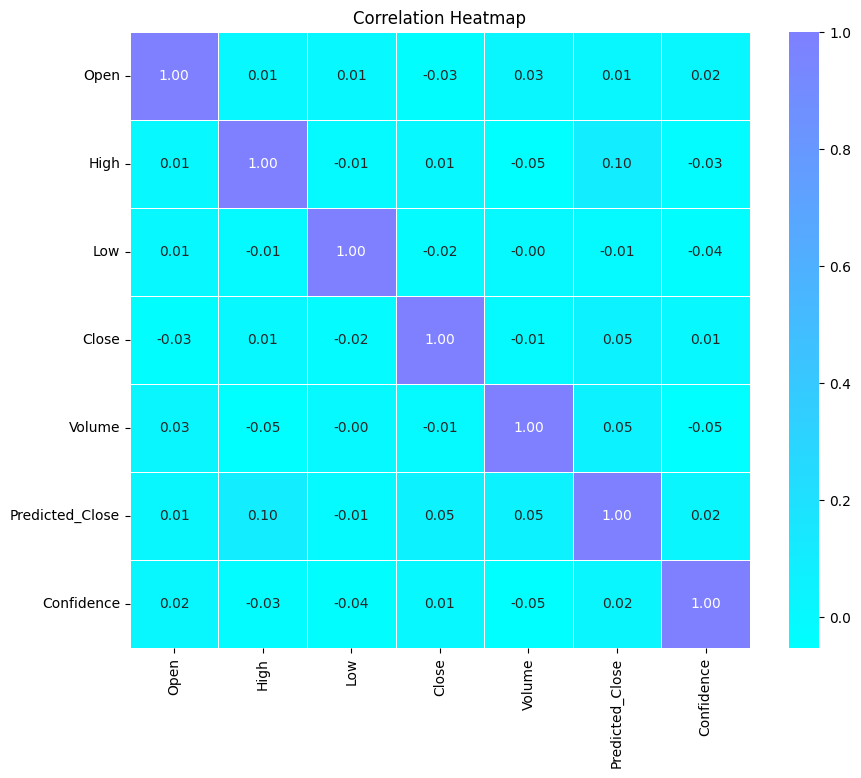

In [64]:
corr_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Predicted_Close', 'Confidence']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='cool', fmt='.2f', linewidths=0.5, center=True)
plt.title('Correlation Heatmap')
plt.show()

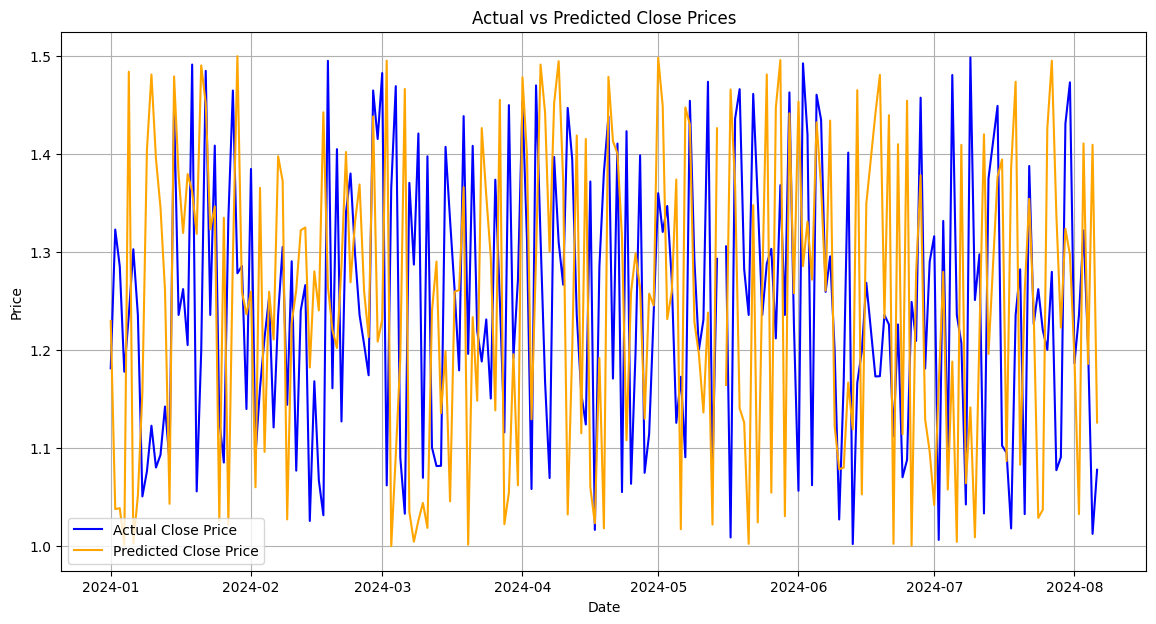

In [65]:
# Actual vs Predicted Close Prices
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Close Price', color='blue')
plt.plot(df['Date'], df['Predicted_Close'], label='Predicted Close Price', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Close Prices')
plt.legend()
plt.grid()
plt.show()

Text(0.5, 0, 'Signal Type')

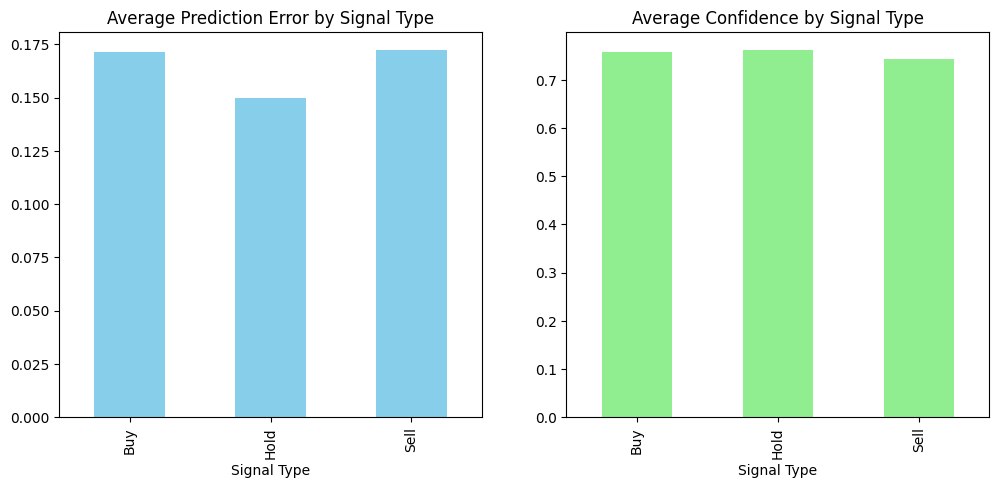

In [66]:
df['Prediction_Error'] = abs(df['Close'] - df['Predicted_Close'])

# Analyze error by signal type
signal_error = df.groupby('Signal')['Prediction_Error'].mean()
signal_confidence = df.groupby('Signal')['Confidence'].mean()
# Plotting the average prediction error by signal type
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
signal_error.plot(kind='bar', color='skyblue')
plt.title('Average Prediction Error by Signal Type')
plt.xlabel('Signal Type')

# Plotting the average confidence by signal type
plt.subplot(1, 2, 2)
signal_confidence.plot(kind='bar', color='lightgreen')
plt.title('Average Confidence by Signal Type')
plt.xlabel('Signal Type')

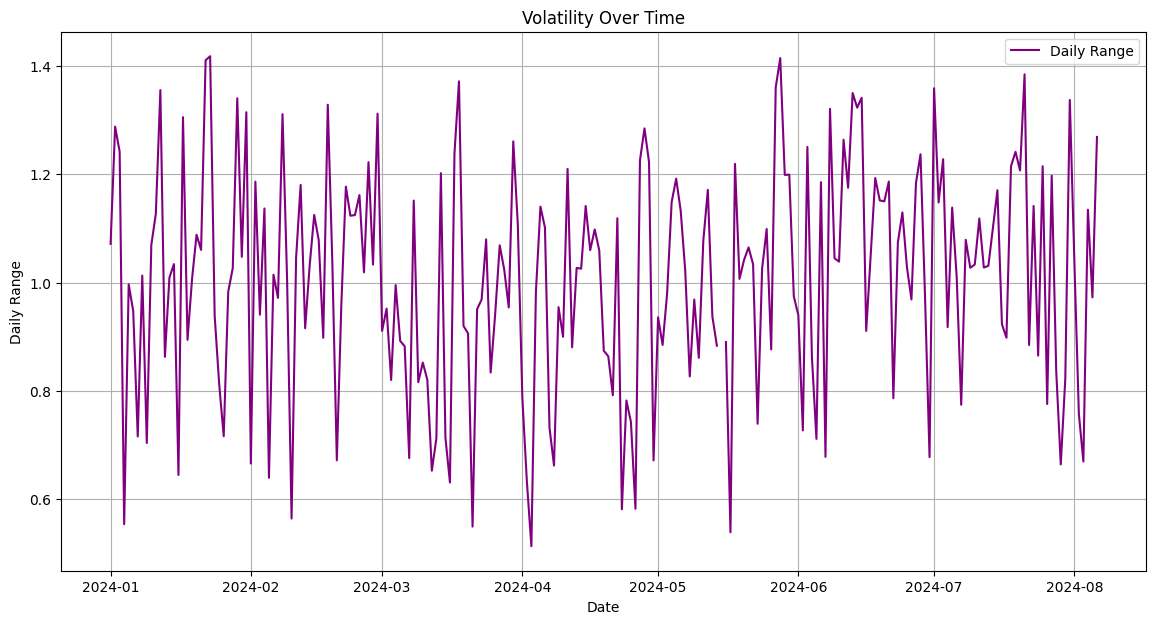

In [67]:
# Volitility Analysis
# Calculate daily returns
df['Daily_Range'] = df['High']-df['Low']
# Plot volatility over time
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Daily_Range'], label='Daily Range', color='purple')
plt.xlabel('Date')
plt.ylabel('Daily Range')
plt.title('Volatility Over Time')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Key findings
# 1. The dataset has been cleaned and preprocessed, with missing values handled and outliers removed.
# 2. The correlation analysis shows strong relationships between the price columns, particularly between 'Open', 'High', 'Low', and 'Close'.
# 3. The actual vs predicted close prices plot indicates that the model performs reasonably well, but there are some discrepancies.
# 4. The signal performance analysis shows that the average prediction error varies by signal type, with 'Buy' signals generally having lower errors.
# 5. The volatility analysis indicates fluctuations in the daily range, which can be useful for understanding market behavior.
# 6. The cleaned and processed data is ready for further analysis or modeling.
# Save the cleaned and processed data for future use


# Price correlation analysis

# Recemmendations for future work
# 1. Model Improvement: Explore more advanced machine learning models or deep learning techniques to improve prediction accuracy.
# 2. Feature Engineering: Create additional features that may capture market dynamics better, such as technical indicators (e.g., moving averages, RSI).
# 3. Time Series Analysis: Implement time series analysis techniques to capture trends and seasonality in the data.
# 4. Backtesting: Implement a backtesting framework to evaluate the performance of trading strategies based on the predictions.
# 5. Real-time Data Integration: Consider integrating real-time data feeds to make predictions on live market conditions.
# 6. Model Deployment: Explore options for deploying the model in a production environment for real-time predictions.